In [215]:
import os
import pandas as pd
import seaborn as sns
os.getcwd()
sns.set(rc={'figure.figsize':(10,5)})
import matplotlib.pyplot as plt

In [216]:
os.chdir('C:\\Users\\Tom Joseph\\Downloads\\VM Case Study')

In [276]:
main = pd.read_csv('main_header.csv')
channel = pd.read_csv('channel_header.csv')
categories = pd.read_csv('categories_header.csv')
main['date'] = pd.to_datetime(main['date'])


In [218]:
channel

,Channel,Channel ID,2019 total cost
0,affiliate,1,138048.38
1,brand,2,0.00
2,crm,3,0.00
3,display,4,1177056.18
4,other,5,0.00
5,search,6,3439873.52
6,social,7,1513755.36


In [219]:
categories.rename(columns={'category id':'category ID'},inplace=True)

In [220]:
main.head()

,date,country,channel ID,category ID,sessions,pageviews,conversions,revenue,bounces,total_session_duration_in_ms
0,2019-01-01,cz,5,10,2,3,0,0.000,0,3146790
1,2019-01-01,cz,2,10,92,228,157,116.040,9,296735116
2,2019-01-01,cz,7,10,186,383,215,226.908,35,208787607
3,2019-01-01,cz,4,10,67,235,85,76.212,12,273295421
4,2019-01-01,cz,6,10,562,1437,741,541.952,85,1252733604


In [221]:
main.shape
 

In [222]:
channel.rename(columns ={'Channel ID':'channel ID'},inplace=True)

In [223]:
 channel

,Channel,channel ID,2019 total cost
0,affiliate,1,138048.38
1,brand,2,0.00
2,crm,3,0.00
3,display,4,1177056.18
4,other,5,0.00
5,search,6,3439873.52
6,social,7,1513755.36


In [224]:
df = pd.merge(main,channel,on='channel ID',how='inner').drop(columns=['channel ID','2019 total cost'])

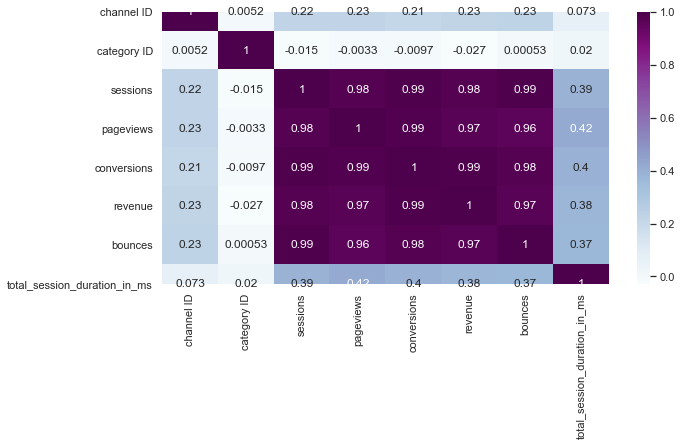

In [225]:
sns.heatmap(main.corr(),cmap='BuPu',annot=True)
plt.show()

In [226]:
channel_revenue = df.groupby('Channel')['revenue'].sum().sort_values(ascending=False).to_frame().reset_index()

channel_revenue = pd.merge(channel,channel_revenue,on='Channel')

channel_revenue['profit'] = channel_revenue['revenue'] - channel_revenue['2019 total cost']

In [227]:
channel_revenue['ROI'] = round((channel_revenue['profit']/channel_revenue['2019 total cost'])*100,2)





In [228]:
channel_revenue.to_csv('channel_revenue.csv')

In [229]:
channel_revenue

,Channel,channel ID,2019 total cost,revenue,profit,ROI
0,affiliate,1,138048.38,162.548,-137885.832,-99.88
1,brand,2,0.00,505679.500,505679.500,inf
2,crm,3,0.00,36830.952,36830.952,inf
3,display,4,1177056.18,678781.824,-498274.356,-42.33
4,other,5,0.00,118073.272,118073.272,inf
5,search,6,3439873.52,4046192.160,606318.640,17.63
6,social,7,1513755.36,874891.284,-638864.076,-42.20


In [230]:
main['date'] = main['date'].apply(lambda x : x.toordinal())

In [231]:
main

,date,country,channel ID,category ID,sessions,pageviews,conversions,revenue,bounces,total_session_duration_in_ms
0,737060,cz,5,10,2,3,0,0.000,0,3146790
1,737060,cz,2,10,92,228,157,116.040,9,296735116
2,737060,cz,7,10,186,383,215,226.908,35,208787607
3,737060,cz,4,10,67,235,85,76.212,12,273295421
4,737060,cz,6,10,562,1437,741,541.952,85,1252733604
...,...,...,...,...,...,...,...,...,...,...
27850,737424,pl,7,9,54,92,68,23.476,8,48886328
27851,737424,pl,6,9,966,1800,1323,393.700,133,1475027582
27852,737424,pl,4,9,102,202,50,23.668,30,148290605
27853,737424,pl,5,9,15,27,13,3.960,2,8904023


In [241]:
from sklearn.preprocessing import LabelEncoder

 

encoder = LabelEncoder()

main['country'] = encoder.fit_transform(main['country'])



 

In [260]:
from sklearn.model_selection import train_test_split
X = main.drop(columns=['conversions','revenue'])
y = main['conversions']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

 

In [261]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [264]:
feature_importance = pd.DataFrame(zip(X.columns,model.feature_importances_),columns=['feature','feature_importance'])

feature_importance

,feature,feature_importance
0,date,0.001226
1,country,0.000381
2,channel ID,0.000226
3,category ID,0.000753
4,sessions,0.920806
5,pageviews,0.057653
6,bounces,0.014179
7,total_session_duration_in_ms,0.004776


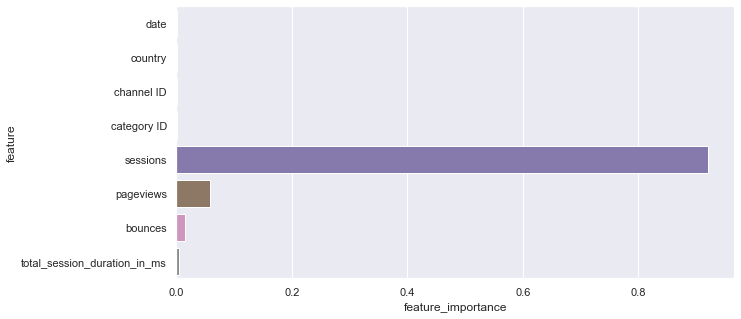

In [265]:
sns.barplot( y='feature',x='feature_importance',data = feature_importance)

In [445]:
datewise_revenue = main.groupby('date')['revenue'].sum().reset_index()

In [446]:
datewise_revenue['day of week'] = datewise_revenue['date'].dt.dayofweek

In [447]:
days = {0:'0 Monday',1:'1 Tuesday',2:'2 Wednesday',3:'3 Thursday',4:'4 Friday',5:'5 Saturday',6:'6 Sunday'}

In [448]:
datewise_revenue['day of week'] = datewise_revenue['day of week'].map(days)

In [449]:
datewise_revenue['month'] = datewise_revenue['date'].dt.month

In [450]:
months = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

In [451]:
datewise_revenue['month'] = datewise_revenue['month'].map(months)

In [459]:
df = datewise_revenue
 

In [396]:
df = df.drop(columns=['date']).sort_index()

In [397]:
df = df[['month','day of week','revenue']]
df.dropna(inplace=True)

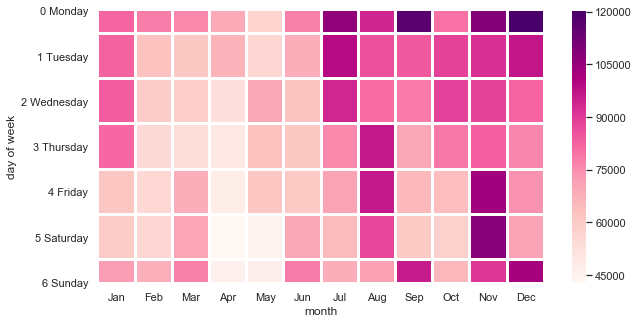

In [460]:
month_day_revenue = pd.crosstab(df['day of week'],df['month'],values=df['revenue'],aggfunc='sum')
month_day_revenue = month_day_revenue[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']] 
month_day_revenue.sort_index(level = 'day of week')
sns.heatmap(month_day_revenue,cmap='RdPu',fmt='d',linewidths=2)
plt.show()

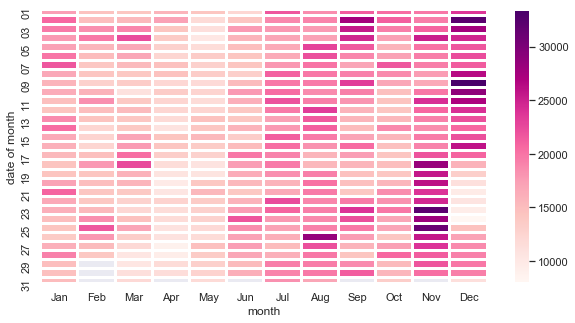

In [463]:
month_day_revenue = pd.crosstab(ff['date of month'],df['month'],values=df['revenue'],aggfunc='sum')
month_day_revenue = month_day_revenue[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']] 
month_day_revenue.sort_index(level = 'date of month')
sns.heatmap(month_day_revenue,cmap='RdPu',fmt='d',linewidths=2)
plt.show()

In [462]:
ff = datewise_revenue

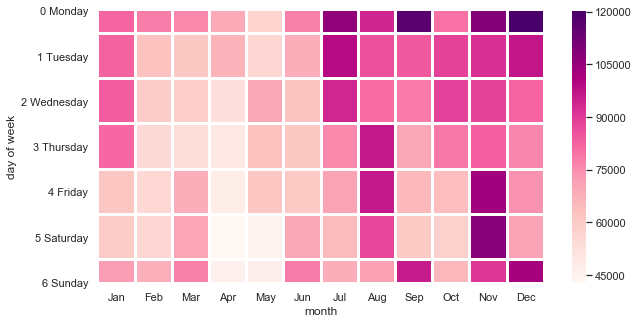

In [452]:
datewise_revenue['date'] = datewise_revenue['date'].astype('str')

In [453]:
datewise_revenue['date of month'] = datewise_revenue['date'].apply(lambda x : x.split('-')[2])

In [457]:
datewise_revenue = datewise_revenue.drop(columns=['date'])

In [458]:
datewise_revenue

,revenue,day of week,month,date of month
0,17582.636,1 Tuesday,Jan,01
1,20745.792,2 Wednesday,Jan,02
2,19641.544,3 Thursday,Jan,03
3,17825.216,4 Friday,Jan,04
4,17230.016,5 Saturday,Jan,05
...,...,...,...,...
360,18750.032,4 Friday,Dec,27
361,19277.628,5 Saturday,Dec,28
362,19818.848,6 Sunday,Dec,29
363,19316.744,0 Monday,Dec,30
